In [143]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [144]:
Rtl_data = pd.read_excel('/content/new_sail_data.xlsx')
Rtl_data.head()

,SL.NO,D.O.P,CUSTOMER ID,SEGMENT,UNITS_Purchased (TONS),TOTAL AMOUNT,AREA,BRANCH CONTACTED,TYPE,GRADE,THICKNESS(mm),TENURE,Status,Purchased/Not
0,1,2020-01-15,110281,Appliances,35,6300000,TAMIL NADU,CHENNAI,Coil,SS 301,0.50,10.0,Purchased,1
1,2,2020-02-22,110281,Appliances,120,21600000,ANDHRA PRADESH,HYDERABAD,Sheet,SS 310S,0.63,10.0,Purchased,1
2,3,2020-03-10,110281,Appliances,100,18000000,KERALA,CHENNAI,Sheet,SS 310S,0.63,10.0,Purchased,1
3,4,2020-03-12,110281,Appliances,80,14400000,TAMIL NADU,CHENNAI,Sheet,SS 301,0.50,10.0,Purchased,1
4,5,2020-04-25,110281,Appliances,45,8100000,KERALA,CHENNAI,Sheet,SS 301,0.50,10.0,Purchased,1


In [145]:
Rtl_data['SEGMENT'].unique()

array(['Appliances', 'ABC', 'ART', 'Structural', 'Chemical',
       'Food and Beverages'], dtype=object)

In [146]:
Rtl_data.dtypes

SL.NO                              int64
D.O.P                     datetime64[ns]
CUSTOMER ID                        int64
SEGMENT                           object
UNITS_Purchased (TONS)             int64
TOTAL AMOUNT                       int64
AREA                              object
BRANCH CONTACTED                  object
TYPE                              object
GRADE                             object
THICKNESS(mm)                    float64
TENURE                           float64
Status                            object
Purchased/Not                      int64
dtype: object

In [147]:
import numpy as np
Rtl_data['TENURE'] = pd.to_numeric(Rtl_data['TENURE'], errors = 'coerce')
#Rtl_data = Rtl_data.replace(np.nan,0,regex = True)
Rtl_data.dropna(axis = 0,inplace = True)

In [148]:
Rtl_data.dtypes

SL.NO                              int64
D.O.P                     datetime64[ns]
CUSTOMER ID                        int64
SEGMENT                           object
UNITS_Purchased (TONS)             int64
TOTAL AMOUNT                       int64
AREA                              object
BRANCH CONTACTED                  object
TYPE                              object
GRADE                             object
THICKNESS(mm)                    float64
TENURE                           float64
Status                            object
Purchased/Not                      int64
dtype: object

In [149]:
Industry = pd.DataFrame(Rtl_data[["SEGMENT","TOTAL AMOUNT"]])

In [150]:
G = pd.DataFrame(Industry.groupby('SEGMENT').sum({'TOTAL AMOUNT'})).reset_index()
G

,SEGMENT,TOTAL AMOUNT
0,ABC,2015280000
1,ART,4588560000
2,Appliances,2939220000
3,Chemical,2007360000
4,Food and Beverages,1732320000
5,Structural,3121740000


Text(0, 0.5, 'AMOUNT PURCHASED')

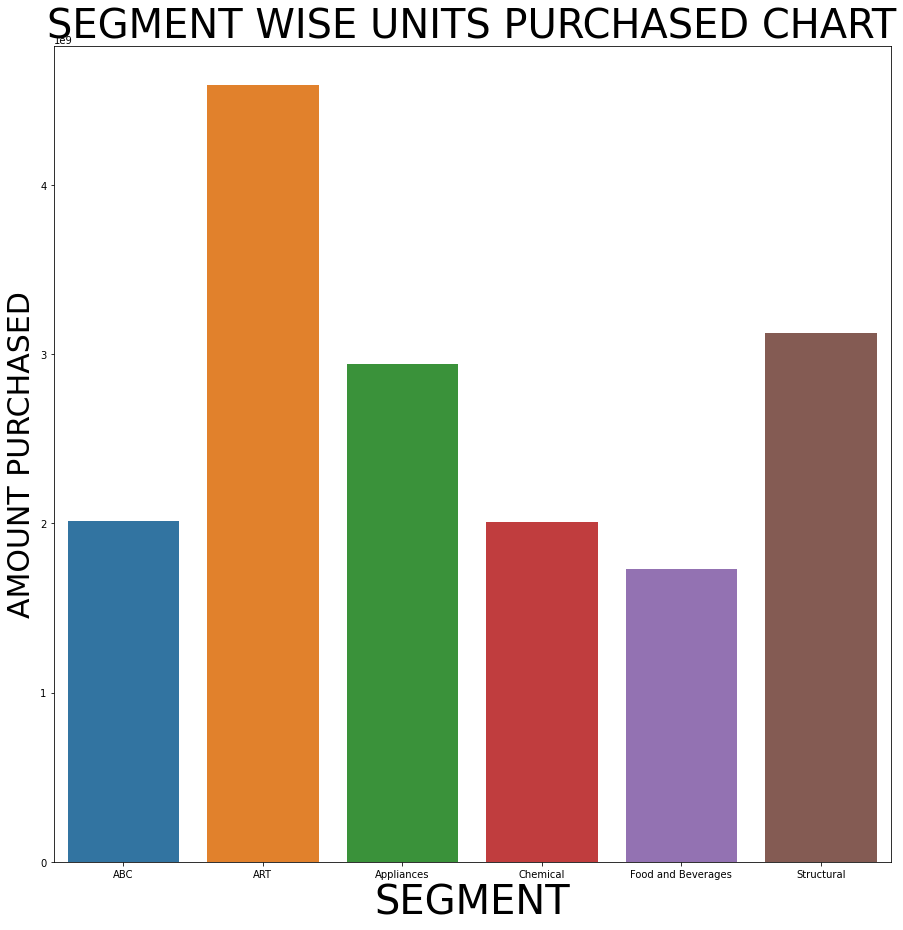

In [ ]:
import seaborn as sns
plt.figure(figsize =(15,15))
ax  = sns.barplot(x='SEGMENT',y='TOTAL AMOUNT',data = G)
plt.title("SEGMENT WISE UNITS PURCHASED CHART",fontsize =40)
plt.xlabel('SEGMENT',fontsize =40)
plt.ylabel('AMOUNT PURCHASED',fontsize = 30)

In [151]:
S = pd.DataFrame(Rtl_data.groupby('BRANCH CONTACTED').sum({'TOTAL AMOUNT'})).reset_index()
S= S.drop(columns='THICKNESS(mm)')
S= S.drop(columns = 'SL.NO')
S= S.drop(columns = 'CUSTOMER ID')
S

,BRANCH CONTACTED,UNITS_Purchased (TONS),TOTAL AMOUNT,TENURE,Purchased/Not
0,AHMEDABAD,10339,1861020000,1832.0,60
1,BANGALORE,14304,2574720000,2690.0,29
2,CHENNAI,20068,3612240000,4083.5,27
3,COIMBATORE,15094,2716920000,2781.0,4
4,DELHI,6986,1257480000,1388.5,-8
5,HYDERABAD,9267,1668060000,2012.0,9
6,KOLKATA,7243,1303740000,1382.0,14
7,MUMBAI,7835,1410300000,1594.0,7


Text(0, 0.5, 'UNITS PURCHASED')

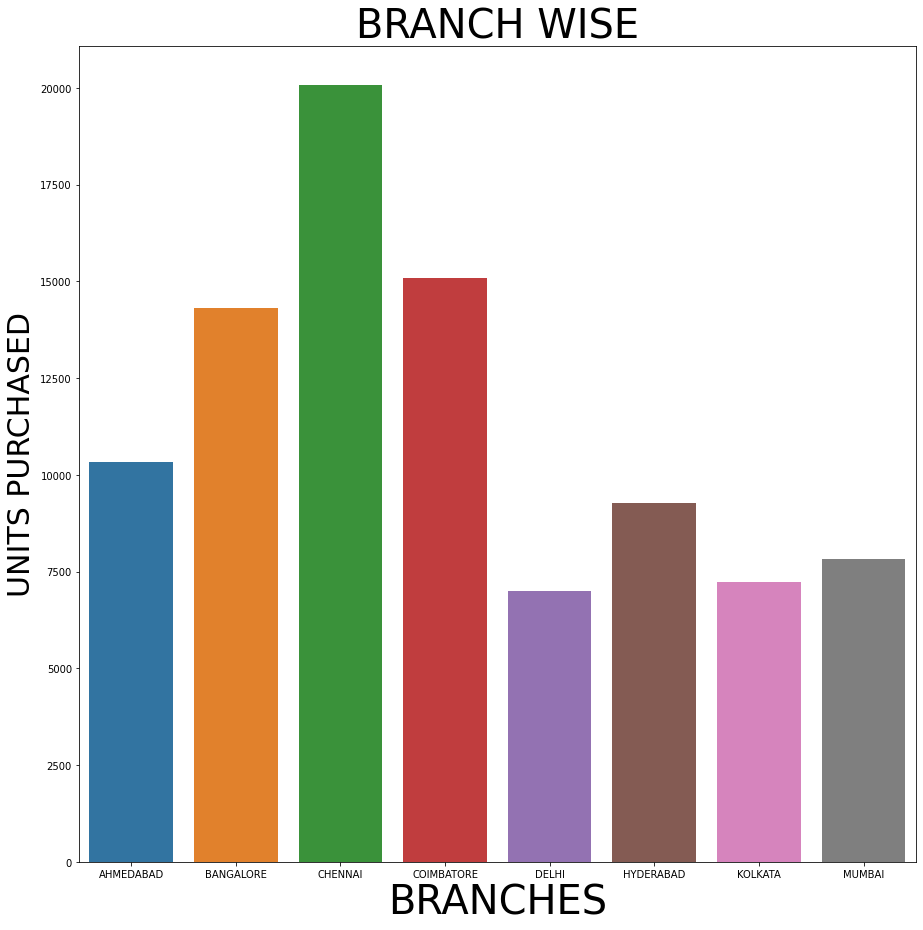

In [ ]:
plt.figure(figsize =(15,15))
ax  = sns.barplot(x='BRANCH CONTACTED',y='UNITS_Purchased (TONS)',data = S)
plt.title("BRANCH WISE",fontsize =40)
plt.xlabel('BRANCHES',fontsize =40)
plt.ylabel('UNITS PURCHASED',fontsize = 30)

Text(0, 0.5, 'TOTAL AMOUNT')

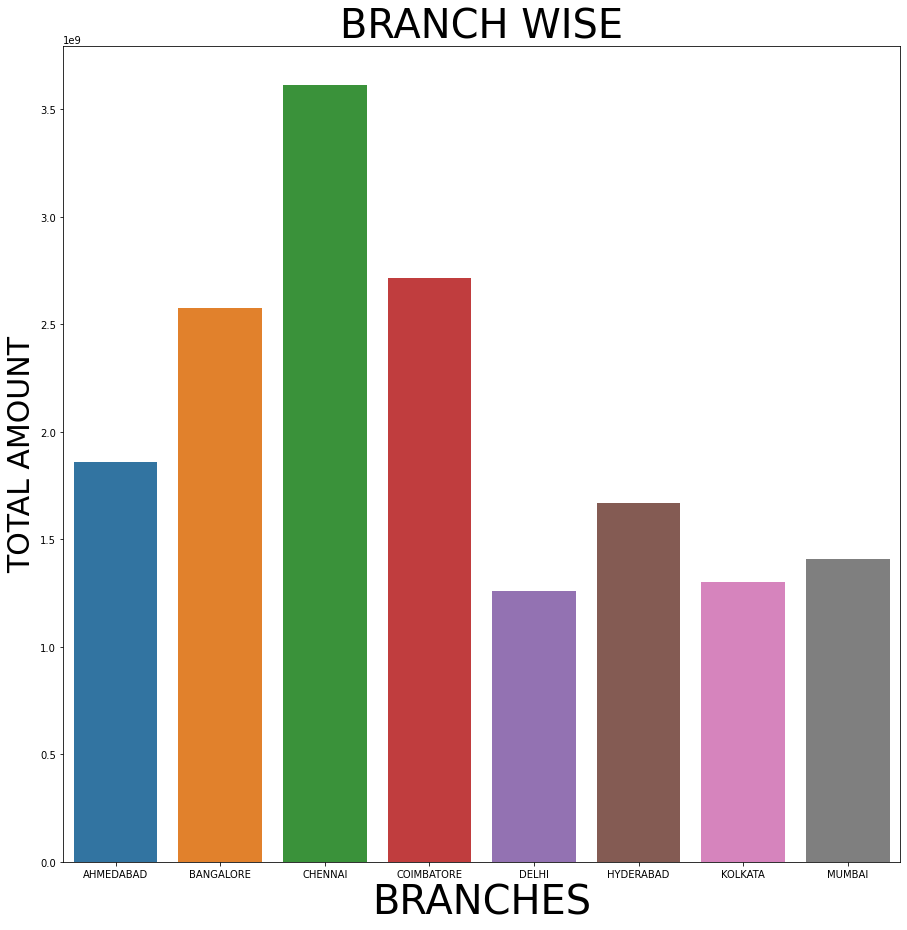

In [ ]:
plt.figure(figsize =(15,15))
ax  = sns.barplot(x='BRANCH CONTACTED',y='TOTAL AMOUNT',data = S)
plt.title("BRANCH WISE",fontsize =40)
plt.xlabel('BRANCHES',fontsize =40)
plt.ylabel('TOTAL AMOUNT',fontsize = 30)

In [152]:
F = pd.DataFrame(Rtl_data.groupby('SEGMENT').sum({'TOTAL AMOUNT'})).reset_index()
F= F.drop(columns='THICKNESS(mm)')
F= F.drop(columns = 'SL.NO')
F= F.drop(columns = 'CUSTOMER ID')
F

,SEGMENT,UNITS_Purchased (TONS),TOTAL AMOUNT,TENURE,Purchased/Not
0,ABC,11196,2015280000,2248.0,2
1,ART,25492,4588560000,4851.0,17
2,Appliances,16329,2939220000,3127.0,47
3,Chemical,11152,2007360000,2174.0,14
4,Food and Beverages,9624,1732320000,1974.0,-13
5,Structural,17343,3121740000,3389.0,75


In [153]:
import seaborn as sns

Text(0, 0.5, 'TOTAL AMOUNT')

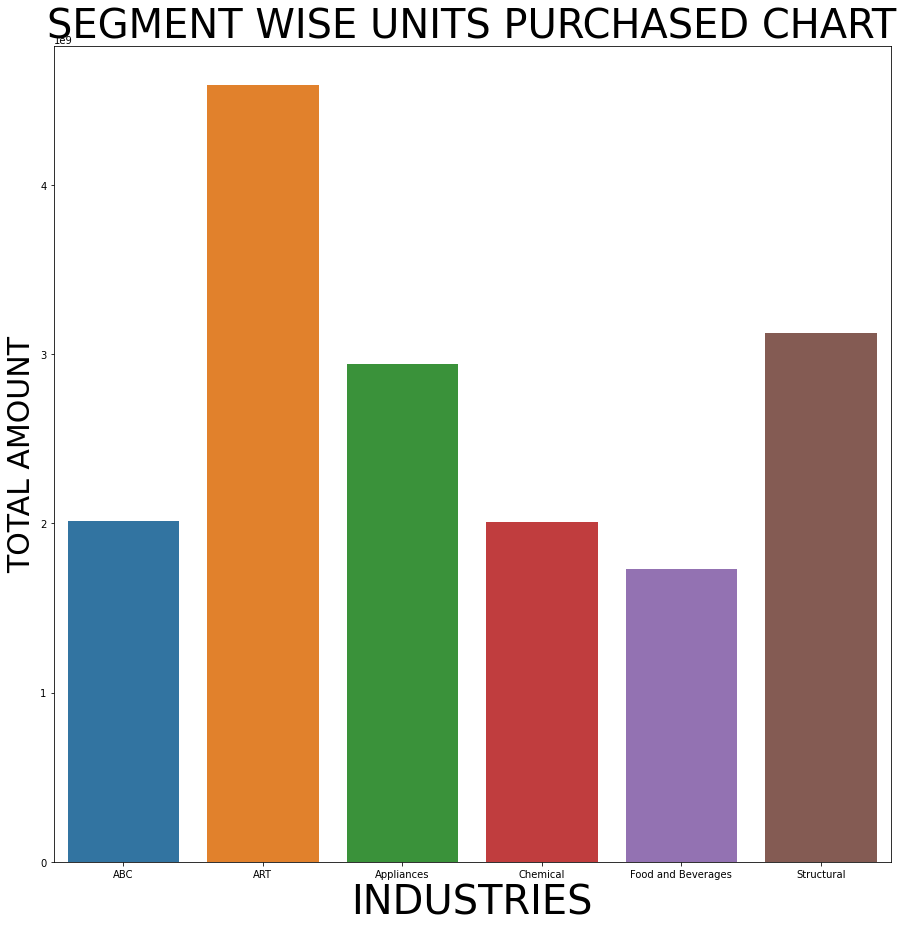

In [ ]:
plt.figure(figsize =(15,15))
ax  = sns.barplot(x='SEGMENT',y='TOTAL AMOUNT',data = F)
plt.title("SEGMENT WISE UNITS PURCHASED CHART",fontsize =40)
plt.xlabel('INDUSTRIES',fontsize =40)
plt.ylabel('TOTAL AMOUNT',fontsize = 30)

In [154]:
Rtl_data.shape

(1598, 14)

In [155]:
Rtl_data['CUSTOMER ID'].unique().shape

(195,)

In [156]:
Rtl_data['D.O.P'] = pd.to_datetime(Rtl_data['D.O.P'])

In [157]:
import datetime as dt

In [158]:
Latest_Date = dt.datetime(2020,12,31)

In [159]:
'''def f(row):
  if row > 0 and row < 5:
    return 1
  elif row > 4 and row < 10:
    return 4
  elif row > 9 and row < 15:
    return 7
  elif row > 14 and row < 20:
    return 10
  elif row > 19 and row < 25:
    return 13
  else:
    return 16

Rtl_data['TSCORE'] = Rtl_data['TENURE'].apply(f)'''

"def f(row):\n  if row > 0 and row < 5:\n    return 1\n  elif row > 4 and row < 10:\n    return 4\n  elif row > 9 and row < 15:\n    return 7\n  elif row > 14 and row < 20:\n    return 10\n  elif row > 19 and row < 25:\n    return 13\n  else:\n    return 16\n\nRtl_data['TSCORE'] = Rtl_data['TENURE'].apply(f)"

In [160]:
def f(row):
  if row > 0 and row <= 2:
    return 1.34
  elif row > 2 and row <= 4:
    return 2 
  elif row > 4 and row <= 6:
    return 2.56
  elif row > 6 and row <= 8:
    return 3.25
  elif row > 8 and row <=10:
    return 4.67
  elif row > 10 and row <= 12:
    return 5.45
  elif row > 12 and row <=14:
    return 6.23
  elif row > 14 and row <= 16:
    return 7.89
  elif row > 16 and row <= 18:
    return 8.91
  elif row > 18 and row <= 20:
    return 9.92
  elif row > 20 and row <= 22:
    return 10.43
  elif row > 22 and row <= 24:
    return 11.52
  else:
    return 12.23

Rtl_data['TSCORE'] = Rtl_data['TENURE'].apply(f)

In [163]:
Rtl_data['TSCORE'].unique()

array([ 4.67,  5.45, 11.52,  6.23,  9.92,  7.89,  3.25,  2.  ,  2.56,
        8.91, 10.43,  1.34])

In [164]:
Rtl_data['TENURE'].unique()

array([10. , 12. , 24. , 13. , 19. , 23. , 20. , 16. , 11. ,  8. ,  9. ,
       14. ,  3. ,  4. ,  5. , 15. , 17. ,  6. , 18. ,  7. , 21. ,  2.5,
       22. ,  2. ])

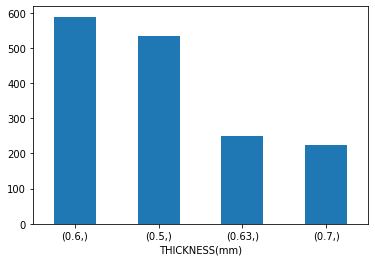

In [165]:
import seaborn as sns
import matplotlib.pyplot as plt
Thickness = Rtl_data['THICKNESS(mm)']
label = pd.DataFrame(Thickness)
label.value_counts().plot.bar(rot=0)


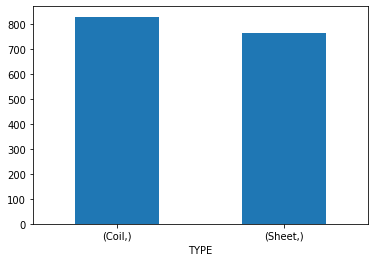

In [166]:
import matplotlib.pyplot as plt
Type = Rtl_data['TYPE']
label1 = pd.DataFrame(Type)
label1.value_counts().plot.bar(rot=0)

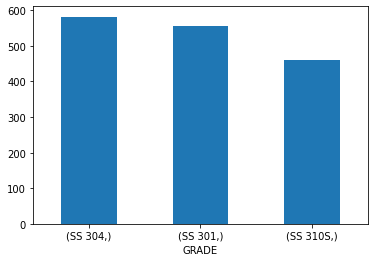

In [167]:
import matplotlib.pyplot as plt
GRADE = Rtl_data['GRADE']
label1 = pd.DataFrame(GRADE)
label1.value_counts().plot.bar(rot=0) 

In [168]:
FMTScores = Rtl_data.groupby('CUSTOMER ID').agg({'CUSTOMER ID': lambda x: len(x) , 'TOTAL AMOUNT': lambda x: x.sum(),'Purchased/Not': lambda x: x.sum(), 'TSCORE': lambda x : x.sum(),'D.O.P': lambda x: (Latest_Date - x.max()).days})
FMTScores['D.O.P'] = FMTScores['D.O.P'].astype(int)

In [169]:
FMTScores.head()

,CUSTOMER ID,TOTAL AMOUNT,Purchased/Not,TSCORE,D.O.P
CUSTOMER ID,,,,,
100021,7,62100000,3,22.75,1
100022,5,47700000,1,31.15,10
100023,9,86220000,1,24.25,88
100024,9,122760000,5,61.87,88
100025,4,37620000,0,24.92,169


In [170]:
FMTScores['TSCORE'].unique()

array([ 22.75,  31.15,  24.25,  61.87,  24.92, 117.71,  16.92,  45.82,
        62.88,  56.72,  54.54,  23.48,  12.57,  19.8 ,  37.12,  19.53,
        54.37,  17.24,   9.12,  26.25,  72.04,  13.34,  27.59,  23.13,
        11.9 ,  67.21,  39.01,  35.52,  16.8 ,  12.37,  48.38,  89.28,
         8.  ,  29.25,  21.8 ,  62.58,   4.02, 126.72, 106.92,  51.37,
       138.24,  71.01,  26.  ,  98.01,  89.1 , 115.2 ,  12.  ,  14.  ,
        18.  ,  24.  ,  56.04,  74.76,  23.04,  62.3 ,  32.5 ,  46.7 ,
        81.75,  10.24,  42.03, 125.16,  25.11,  93.87,  49.05,  39.  ,
        53.46,  73.01,  55.23,  65.4 , 119.04, 109.12,  94.68,  54.5 ,
        20.  ,  29.05,  78.9 ,  25.6 ,  30.72,  99.2 ,  80.64,  63.12,
        92.16,  79.36,  83.44, 103.68,   4.  ,   2.68,   5.12,   3.34,
        22.  ,  43.61,   6.  ,   7.68,  23.35,   9.75,  16.  ])

In [171]:
FMTScores.rename(columns={'CUSTOMER ID': 'Frequency', 
                         'TOTAL AMOUNT': 'Monetary',
                         'D.O.P': 'Recency',
                          'Purchased/Not':'P'}, inplace=True)
FMTScores['TSCORE'] = FMTScores['TSCORE']/FMTScores['Frequency']
FMTScores.reset_index().head(10)

,CUSTOMER ID,Frequency,Monetary,P,TSCORE,Recency
0,100021,7,62100000,3,3.250000,1
1,100022,5,47700000,1,6.230000,10
2,100023,9,86220000,1,2.694444,88
3,100024,9,122760000,5,6.874444,88
4,100025,4,37620000,0,6.230000,169
5,100026,11,108900000,-1,10.700909,12
6,100027,8,105300000,8,2.115000,103
7,100028,5,51120000,-3,9.164000,139
8,100029,6,74880000,-2,10.480000,95
9,100030,12,138240000,0,4.726667,-4


In [172]:
FMTScores['Recency'].unique()

array([  1,  10,  88, 169,  12, 103, 139,  95,  -4,   2,   3,  92,  32,
        -6,  93,  71, 184,  -5, 187,  25,  62, 122, 135, 137,  64,  14,
        50,  80, 131,  35,   6,   8,  20,  26,  19,  15,  43, 115,  85,
        55,  24,  51,  60,  30,  91, 212,  49,  29, 141, 109,  79, 112,
       353, 172,  11,  82,  78,  77,  45,  40, 154,  13,   0,  31,  58,
        33,   7, 205,  22,  21, 190, 189, 188, 193, 192, 191, 182, 181,
       180, 177, 171,  17,  76, 176, 175, 174, 165, 164,  37])

In [173]:
#FMTScores.to_csv('FMTrecency.csv')

In [174]:
FMTScores['TSCORE'].unique()

array([ 3.25      ,  6.23      ,  2.69444444,  6.87444444, 10.70090909,
        2.115     ,  9.164     , 10.48      ,  4.72666667,  6.8175    ,
        3.35428571,  2.514     ,  1.98      ,  2.65142857,  4.8825    ,
        9.06166667,  1.91555556,  2.28      ,  2.38636364,  5.54153846,
        3.335     ,  2.29916667,  2.313     ,  1.98333333,  5.60083333,
        3.00076923,  2.73230769,  2.4       ,  2.474     ,  8.06333333,
        9.92      ,  2.        ,  5.45      , 10.43      ,  1.34      ,
       11.52      ,  8.91      ,  4.67      ,  7.89      ,  8.91      ,
       11.52      ,  6.23      ,  2.56      ,  4.67      ,  5.45      ,
       10.43      ,  2.79      , 10.43      ,  7.89      ,  2.905     ,
        2.56      ,  1.67      ,  6.23      ])

In [175]:
FMTScores['P'].unique()

array([  3,   1,   5,   0,  -1,   8,  -3,  -2,  -4,   7,  -7,   6, -10,
         2,   4,  -5,  -6,   9,  -9,  -8, -11])

In [176]:
#FMTScores.to_csv('FMTscore.csv')

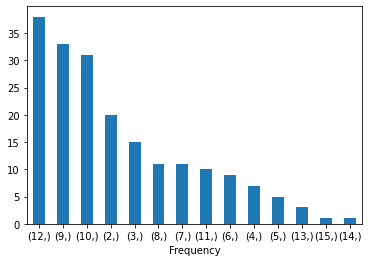

In [177]:
import matplotlib.pyplot as plt
Frequency= FMTScores['Frequency']
plotf = pd.DataFrame(Frequency)
plotf.value_counts().plot.bar(rot=0)

In [178]:
FMTScores.Frequency.describe()

count    195.000000
mean       8.194872
std        3.448139
min        2.000000
25%        6.000000
50%        9.000000
75%       11.000000
max       15.000000
Name: Frequency, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



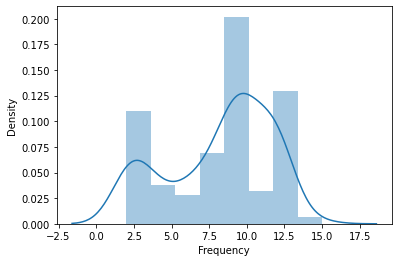

In [179]:
import seaborn as sns
x = FMTScores['Frequency']

ax = sns.distplot(x)

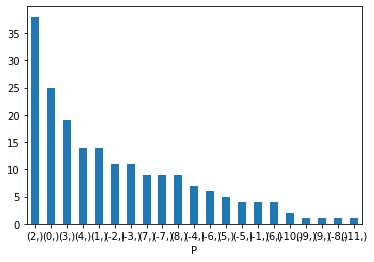

In [180]:
import matplotlib.pyplot as plt
Purchase= FMTScores['P']
plotf = pd.DataFrame(Purchase)
plotf.value_counts().plot.bar(rot=0)

In [181]:
FMTScores.P.describe()

count    195.000000
mean       0.728205
std        4.128475
min      -11.000000
25%       -2.000000
50%        2.000000
75%        3.000000
max        9.000000
Name: P, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



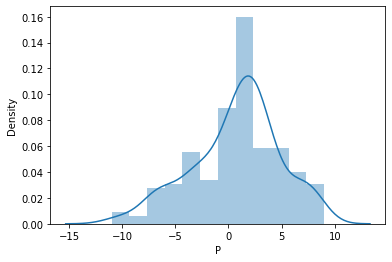

In [182]:
import seaborn as sns
x = FMTScores['P']

ax = sns.distplot(x)

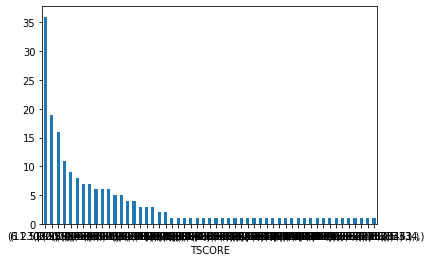

In [183]:
import matplotlib.pyplot as plt
TSCORE= FMTScores['TSCORE']
plotf = pd.DataFrame(TSCORE)
plotf.value_counts().plot.bar(rot=0)

In [184]:
FMTScores.TSCORE.describe()

count    195.000000
mean       4.925626
std        3.208117
min        1.340000
25%        2.289583
50%        3.250000
75%        6.523750
max       11.520000
Name: TSCORE, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



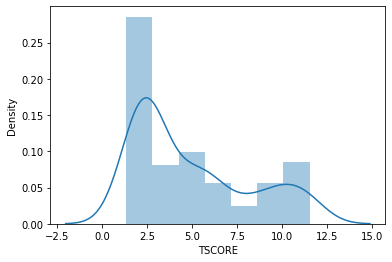

In [185]:
import seaborn as sns
x = FMTScores['TSCORE']

ax = sns.distplot(x)

In [186]:
FMTScores.Monetary.describe()

count    1.950000e+02
mean     8.412554e+07
std      3.864502e+07
min      1.440000e+07
25%      4.905000e+07
50%      8.730000e+07
75%      1.157400e+08
max      1.593000e+08
Name: Monetary, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



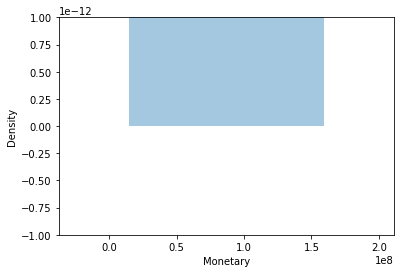

In [187]:
import seaborn as sns
x = FMTScores.query('Monetary < 100000000000')['Monetary']

ax = sns.distplot(x)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



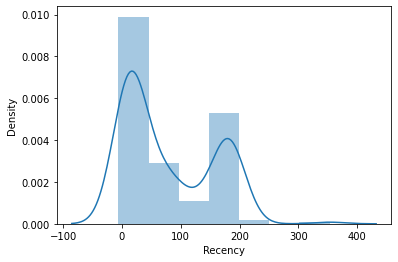

In [188]:
import seaborn as sns
x = FMTScores['Recency']

ax = sns.distplot(x)

In [189]:
FMTScores.Recency.describe()

count    195.000000
mean      78.261538
std       75.756176
min       -6.000000
25%       13.500000
50%       43.000000
75%      169.000000
max      353.000000
Name: Recency, dtype: float64

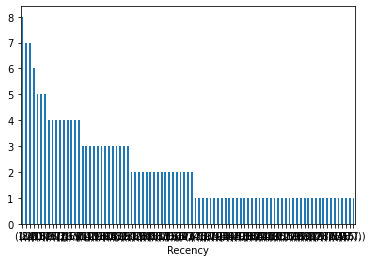

In [190]:
import matplotlib.pyplot as plt
Recency= FMTScores['Recency']
plotf = pd.DataFrame(Recency)
plotf.value_counts().plot.bar(rot=0)

In [191]:
quantiles = FMTScores.quantile(q=[0.5,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95])
quantiles = quantiles.to_dict()
quantiles

{'Frequency': {0.1: 2.400000000000002,
  0.15: 3.0,
  0.2: 4.0,
  0.25: 6.0,
  0.3: 7.0,
  0.35: 8.0,
  0.4: 8.600000000000009,
  0.45: 9.0,
  0.5: 9.0,
  0.55: 9.0,
  0.6: 10.0,
  0.65: 10.0,
  0.7: 10.0,
  0.75: 11.0,
  0.8: 12.0,
  0.85: 12.0,
  0.9: 12.0,
  0.95: 12.0},
 'Monetary': {0.1: 31212000.0,
  0.15: 35981999.99999999,
  0.2: 42156000.0,
  0.25: 49050000.0,
  0.3: 57204000.0,
  0.35: 70722000.0,
  0.4: 76608000.0,
  0.45: 84024000.0,
  0.5: 87300000.0,
  0.55: 92952000.0,
  0.6: 97596000.0,
  0.65: 102474000.0,
  0.7: 110268000.0,
  0.75: 115740000.0,
  0.8: 122004000.00000001,
  0.85: 126864000.0,
  0.9: 133272000.0,
  0.95: 142722000.0},
 'P': {0.1: -5.599999999999998,
  0.15: -4.0,
  0.2: -3.0,
  0.25: -2.0,
  0.3: 0.0,
  0.35: 0.0,
  0.4: 0.0,
  0.45: 1.0,
  0.5: 2.0,
  0.55: 2.0,
  0.6: 2.0,
  0.65: 2.0,
  0.7: 3.0,
  0.75: 3.0,
  0.8: 4.0,
  0.85: 4.0,
  0.9: 6.0,
  0.95: 7.299999999999983},
 'Recency': {0.1: 2.400000000000002,
  0.15: 7.099999999999998,
  0.2: 10.0,


In [192]:
def FScoring(x,p,d):
    if x <= d[p][0.5]:
        return 1
    elif x <= d[p][0.10]:
        return 2.3
    elif x <= d[p][0.15]:
        return 3.6
    elif x <= d[p][0.20]:
        return 4.9
    elif x <= d[p][0.25]:
        return 6.2
    elif x <= d[p][0.30]:
        return 7.5
    elif x <= d[p][0.35]:
        return 8.8
    elif x <= d[p][0.40]:
        return 10.1
    elif x <= d[p][0.45]: 
        return 11.4
    elif x <= d[p][0.50]:
        return 12.5
    elif x <= d[p][0.55]:
        return 13.8
    elif x <= d[p][0.60]:
        return 15.1
    elif x <= d[p][0.65]:
        return 16.1
    elif x <= d[p][0.70]:
        return 17.4
    elif x <= d[p][0.75]:
        return 18.1
    elif x <= d[p][0.80]:
        return 19.2
    elif x <= d[p][0.85]:
        return 20
    elif x <= d[p][0.90]:
        return 21
    elif x <= d[p][0.95]:
        return 22
    else:
        return 23
def Mscoring(x,p,d):
    if x <= d[p][0.5]:
        return 20
    elif x <= d[p][0.10]:
        return 40
    elif x <= d[p][0.15]:
        return 60
    elif x <= d[p][0.20]:
        return 80
    elif x <= d[p][0.25]:
        return 100
    elif x <= d[p][0.30]:
        return 120
    elif x <= d[p][0.35]:
        return 140
    elif x <= d[p][0.40]:
        return 160
    elif x <= d[p][0.45]: 
        return 180
    elif x <= d[p][0.50]:
        return 200
    elif x <= d[p][0.55]:
        return 220
    elif x <= d[p][0.60]:
        return 240
    elif x <= d[p][0.65]:
        return 260
    elif x <= d[p][0.70]:
        return 280
    elif x <= d[p][0.75]:
        return 300
    elif x <= d[p][0.80]:
        return 320
    elif x <= d[p][0.85]:
        return 340
    elif x <= d[p][0.90]:
        return 360
    elif x <= d[p][0.95]:
        return 380
    else:
        return 300
def Rscoring(x,p,d):
    if x <= d[p][0.5]:
        return 5
    elif x <= d[p][0.10]:
        return 3.7
    elif x <= d[p][0.15]:
        return 2.4
    elif x <= d[p][0.20]:
        return 1.8
    elif x <= d[p][0.25]:
        return 0.8
    elif x <= d[p][0.30]:
        return -0.8
    elif x <= d[p][0.35]:
        return -0.2
    elif x <= d[p][0.40]:
        return -1.32
    elif x <= d[p][0.45]:
        return -2.45
    elif x <= d[p][0.50]:
        return -3.35
    elif x <= d[p][0.55]:
        return -4.8
    elif x <= d[p][0.60]: 
        return -5.5
    elif x <= d[p][0.65]:
        return -6.8
    elif x <= d[p][0.70]:
        return -7.75
    elif x <= d[p][0.75]:
        return -8.85
    elif x <= d[p][0.80]:
        return -9.93
    elif x <= d[p][0.85]:
        return -10.53
    elif x <= d[p][0.90]:
        return -11.78
    elif x <= d[p][0.95]:
        return -12.56
    else:
        return -13
'''def Pscoring(x,p,d):
    if x <= d[p][0.5]:
        return -15.32
    elif x <= d[p][0.10]:
        return -14.32
    elif x <= d[p][0.15]:
        return -13.45
    elif x <= d[p][0.20]:
        return -7.54
    elif x <= d[p][0.25]:
        return -6.48
    elif x <= d[p][0.30]:
        return -5.67
    elif x <= d[p][0.35]:
        return -4.69
    elif x <= d[p][0.40]: 
        return -3.33
    elif x <= d[p][0.45]:
        return -2.56
    elif x <= d[p][0.50]:
        return -1.14
    elif x <= d[p][0.55]:
        return -0.2
    elif x <= d[p][0.60]:
        return 1.3
    elif x <= d[p][0.65]:
        return 2.7
    elif x <= d[p][0.70]:
        return 3.7
    elif x <= d[p][0.75]:
        return 4.7
    elif x <= d[p][0.80]:
        return 5.7
    elif x <= d[p][0.85]:
        return 6.7
    elif x <= d[p][0.90]:
        return 7.7
    elif x <= d[p][0.95]:
        return 8.7
    else:
        return 10'''

'def Pscoring(x,p,d):\n    if x <= d[p][0.5]:\n        return -15.32\n    elif x <= d[p][0.10]:\n        return -14.32\n    elif x <= d[p][0.15]:\n        return -13.45\n    elif x <= d[p][0.20]:\n        return -7.54\n    elif x <= d[p][0.25]:\n        return -6.48\n    elif x <= d[p][0.30]:\n        return -5.67\n    elif x <= d[p][0.35]:\n        return -4.69\n    elif x <= d[p][0.40]: \n        return -3.33\n    elif x <= d[p][0.45]:\n        return -2.56\n    elif x <= d[p][0.50]:\n        return -1.14\n    elif x <= d[p][0.55]:\n        return -0.2\n    elif x <= d[p][0.60]:\n        return 1.3\n    elif x <= d[p][0.65]:\n        return 2.7\n    elif x <= d[p][0.70]:\n        return 3.7\n    elif x <= d[p][0.75]:\n        return 4.7\n    elif x <= d[p][0.80]:\n        return 5.7\n    elif x <= d[p][0.85]:\n        return 6.7\n    elif x <= d[p][0.90]:\n        return 7.7\n    elif x <= d[p][0.95]:\n        return 8.7\n    else:\n        return 10'

In [193]:
FMTScores['R'] = FMTScores['Recency'].apply(Rscoring, args=('Recency',quantiles,))
FMTScores['F'] = FMTScores['Frequency'].apply(FScoring, args=('Frequency',quantiles,))
FMTScores['M'] = FMTScores['Monetary'].apply(Mscoring, args=('Monetary',quantiles,))
#FMTScores['Pscore'] = FMTScores['P'].apply(Pscoring, args=('P',quantiles,))
FMTScores.head()

,Frequency,Monetary,P,TSCORE,Recency,R,F,M
CUSTOMER ID,,,,,,,,
100021,7,62100000,3,3.250000,1,5.00,1.0,20
100022,5,47700000,1,6.230000,10,5.00,1.0,20
100023,9,86220000,1,2.694444,88,-6.80,1.0,20
100024,9,122760000,5,6.874444,88,-6.80,1.0,340
100025,4,37620000,0,6.230000,169,-8.85,1.0,20


In [194]:
FMTScores['F'].unique()

array([ 1. , 18.1, 19.2, 15.1, 23. ])

In [195]:
FMTScores['FMTGroup'] = FMTScores.F.map(str) + FMTScores.M.map(str) + FMTScores.TSCORE.map(str) + FMTScores.Recency.map(str) + FMTScores.P.map(str)


In [196]:
FMTScores['FMTScore'] = FMTScores[['F', 'M','TSCORE','R','P']].sum(axis = 1)
FMTScores.head()

,Frequency,Monetary,P,TSCORE,Recency,R,F,M,FMTGroup,FMTScore
CUSTOMER ID,,,,,,,,,,
100021,7,62100000,3,3.250000,1,5.00,1.0,20,1.0203.2513,32.250000
100022,5,47700000,1,6.230000,10,5.00,1.0,20,1.0206.23101,33.230000
100023,9,86220000,1,2.694444,88,-6.80,1.0,20,1.0202.6944444444444446881,17.894444
100024,9,122760000,5,6.874444,88,-6.80,1.0,340,1.03406.874444444444445885,346.074444
100025,4,37620000,0,6.230000,169,-8.85,1.0,20,1.0206.231690,18.380000


In [197]:
print(FMTScores['FMTScore'].min())
print(FMTScores['FMTScore'].max())


7.500000000000002
422.12


In [198]:
Loyalty_Level = ['Bronze', 'Silver', 'Gold', 'Platinum']
Score_cuts = pd.qcut(FMTScores.FMTScore, q = 4, labels = Loyalty_Level)
FMTScores['FMT_Loyalty_Level'] = Score_cuts.values
FMTScores.reset_index().head()

,CUSTOMER ID,Frequency,Monetary,P,TSCORE,Recency,R,F,M,FMTGroup,FMTScore,FMT_Loyalty_Level
0,100021,7,62100000,3,3.250000,1,5.00,1.0,20,1.0203.2513,32.250000,Silver
1,100022,5,47700000,1,6.230000,10,5.00,1.0,20,1.0206.23101,33.230000,Silver
2,100023,9,86220000,1,2.694444,88,-6.80,1.0,20,1.0202.6944444444444446881,17.894444,Silver
3,100024,9,122760000,5,6.874444,88,-6.80,1.0,340,1.03406.874444444444445885,346.074444,Platinum
4,100025,4,37620000,0,6.230000,169,-8.85,1.0,20,1.0206.231690,18.380000,Silver


In [199]:
pip install chart_studio

In [224]:
import chart_studio as cs
import plotly.offline as po
import plotly.graph_objs as gobj

In [202]:
#Recency Vs Monetary
graph = FMTScores.query("Monetary < 50000000000 and Frequency < 20")

plot_data = [
    gobj.Scatter(
        x=graph.query("FMT_Loyalty_Level == 'Bronze'")['Recency'],
        y=graph.query("FMT_Loyalty_Level == 'Bronze'")['Monetary'],
        mode='markers',
        name='Bronze',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.5
           )
    ),
        gobj.Scatter(
        x=graph.query("FMT_Loyalty_Level == 'Silver'")['Recency'],
        y=graph.query("FMT_Loyalty_Level == 'Silver'")['Monetary'],
        mode='markers',
        name='Silver',
        marker= dict(size= 10,
            line= dict(width=1),
            color= 'green',
            opacity= 0.7
           )
    ),
        gobj.Scatter(
        x=graph.query("FMT_Loyalty_Level == 'Gold'")['Recency'],
        y=graph.query("FMT_Loyalty_Level == 'Gold'")['Monetary'],
        mode='markers',
        name='Gold',
        marker= dict(size= 13,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
    gobj.Scatter(
        x=graph.query("FMT_Loyalty_Level == 'Platinum'")['Recency'],
        y=graph.query("FMT_Loyalty_Level == 'Platinum'")['Monetary'],
        mode='markers',
        name='Platinum',
        marker= dict(size= 16,
            line= dict(width=1),
            color= 'black',
            opacity= 0.9
           )
    ),
]

plot_layout = gobj.Layout(
        yaxis= {'title': "Monetary"},
        xaxis= {'title': "Recency"},
        title='Segments'
    )
fig = gobj.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)

In [215]:
#Monetary and P
graph = FMTScores.query("Monetary < 50000000000 and Frequency < 20")

plot_data = [
    gobj.Scatter(
        x=graph.query("FMT_Loyalty_Level == 'Bronze'")['Monetary'],
        y=graph.query("FMT_Loyalty_Level == 'Bronze'")['P'],
        mode='markers',
        name='Bronze',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.7
           )
    ),
        gobj.Scatter(
        x=graph.query("FMT_Loyalty_Level == 'Silver'")['Monetary'],
        y=graph.query("FMT_Loyalty_Level == 'Silver'")['P'],
        mode='markers',
        name='Silver',
        marker= dict(size= 10,
            line= dict(width=1),
            color= 'green',
            opacity= 0.7
           )
    ),
        gobj.Scatter(
        x=graph.query("FMT_Loyalty_Level == 'Gold'")['Monetary'],
        y=graph.query("FMT_Loyalty_Level == 'Gold'")['P'],
        mode='markers',
        name='Gold',
        marker= dict(size= 13,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
    gobj.Scatter(
        x=graph.query("FMT_Loyalty_Level == 'Platinum'")['Monetary'],
        y=graph.query("FMT_Loyalty_Level == 'Platinum'")['P'],
        mode='markers',
        name='Platinum',
        marker= dict(size= 16,
            line= dict(width=1),
            color= 'black',
            opacity= 0.9
           )
    ),
]

plot_layout = gobj.Layout(
        yaxis= {'title': "P"},
        xaxis= {'title': "Monetary"},
        title='Segments'
    )
fig = gobj.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)


In [211]:
#TSCORE AND MONETARY
graph = FMTScores.query("Monetary < 50000000000 and Frequency < 20")

plot_data = [
    gobj.Scatter(
        x=graph.query("FMT_Loyalty_Level == 'Bronze'")['Monetary'],
        y=graph.query("FMT_Loyalty_Level == 'Bronze'")['TSCORE'],
        mode='markers',
        name='Bronze',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.7
           )
    ),
        gobj.Scatter(
        x=graph.query("FMT_Loyalty_Level == 'Silver'")['Monetary'],
        y=graph.query("FMT_Loyalty_Level == 'Silver'")['TSCORE'],
        mode='markers',
        name='Silver',
        marker= dict(size= 10,
            line= dict(width=1),
            color= 'green',
            opacity= 0.7
           )
    ),
        gobj.Scatter(
        x=graph.query("FMT_Loyalty_Level == 'Gold'")['Monetary'],
        y=graph.query("FMT_Loyalty_Level == 'Gold'")['TSCORE'],
        mode='markers',
        name='Gold',
        marker= dict(size= 13,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
    gobj.Scatter(
        x=graph.query("FMT_Loyalty_Level == 'Platinum'")['Monetary'],
        y=graph.query("FMT_Loyalty_Level == 'Platinum'")['TSCORE'],
        mode='markers',
        name='Platinum',
        marker= dict(size= 16,
            line= dict(width=1),
            color= 'black',
            opacity= 0.9
           )
    ),
]

plot_layout = gobj.Layout(
        yaxis= {'title': "TSCORE"},
        xaxis= {'title': "Monetary"},
        title='Segments'
    )
fig = gobj.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)


In [217]:
#Tscore and Pscore
graph = FMTScores.query("Monetary < 50000000000 and Frequency < 20")

plot_data = [
    gobj.Scatter(
        x=graph.query("FMT_Loyalty_Level == 'Bronze'")['TSCORE'],
        y=graph.query("FMT_Loyalty_Level == 'Bronze'")['P'],
        mode='markers',
        name='Bronze',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.7
           )
    ),
        gobj.Scatter(
        x=graph.query("FMT_Loyalty_Level == 'Silver'")['TSCORE'],
        y=graph.query("FMT_Loyalty_Level == 'Silver'")['P'],
        mode='markers',
        name='Silver',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.7
           )
    ),
        gobj.Scatter(
        x=graph.query("FMT_Loyalty_Level == 'Gold'")['TSCORE'],
        y=graph.query("FMT_Loyalty_Level == 'Gold'")['P'],
        mode='markers',
        name='Gold',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
    gobj.Scatter(
        x=graph.query("FMT_Loyalty_Level == 'Platinum'")['TSCORE'],
        y=graph.query("FMT_Loyalty_Level == 'Platinum'")['P'],
        mode='markers',
        name='Platinum',
        marker= dict(size= 13,
            line= dict(width=1),
            color= 'black',
            opacity= 0.9
           )
    ),
]

plot_layout = gobj.Layout(
        yaxis= {'title': "P"},
        xaxis= {'title': "TSCORE"},
        title='Segments'
    )
fig = gobj.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)

In [221]:
#Frequency Vs Monetary
graph = FMTScores.query("Monetary < 50000000000 and Frequency < 15")

plot_data = [
    gobj.Scatter(
        x=graph.query("FMT_Loyalty_Level == 'Bronze'")['Monetary'],
        y=graph.query("FMT_Loyalty_Level == 'Bronze'")['Frequency'],
        mode='markers',
        name='Bronze',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.7
           )
    ),
        gobj.Scatter(
        x=graph.query("FMT_Loyalty_Level == 'Silver'")['Monetary'],
        y=graph.query("FMT_Loyalty_Level == 'Silver'")['Frequency'],
        mode='markers',
        name='Silver',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.7
           )
    ),
        gobj.Scatter(
        x=graph.query("FMT_Loyalty_Level == 'Gold'")['Monetary'],
        y=graph.query("FMT_Loyalty_Level == 'Gold'")['Frequency'],
        mode='markers',
        name='Gold',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
    gobj.Scatter(
        x=graph.query("FMT_Loyalty_Level == 'Platinum'")['Monetary'],
        y=graph.query("FMT_Loyalty_Level == 'Platinum'")['Frequency'],
        mode='markers',
        name='Platinum',
        marker= dict(size= 13,
            line= dict(width=1),
            color= 'black',
            opacity= 0.9
           )
    ),
]

plot_layout = gobj.Layout(
        yaxis= {'title': "Frequency"},
        xaxis= {'title': "Monetary"},
        title='Segments'
    )
fig = gobj.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)


In [227]:
#TSCORE AND Recency
graph = FMTScores.query("Monetary < 50000000000 and Frequency < 20")

plot_data = [
    gobj.Scatter(
        x=graph.query("FMT_Loyalty_Level == 'Bronze'")['Recency'],
        y=graph.query("FMT_Loyalty_Level == 'Bronze'")['TSCORE'],
        mode='markers',
        name='Bronze',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        gobj.Scatter(
        x=graph.query("FMT_Loyalty_Level == 'Silver'")['Recency'],
        y=graph.query("FMT_Loyalty_Level == 'Silver'")['TSCORE'],
        mode='markers',
        name='Silver',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        gobj.Scatter(
        x=graph.query("FMT_Loyalty_Level == 'Gold'")['Recency'],
        y=graph.query("FMT_Loyalty_Level == 'Gold'")['TSCORE'],
        mode='markers',
        name='Gold',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
    gobj.Scatter(
        x=graph.query("FMT_Loyalty_Level == 'Platinum'")['Recency'],
        y=graph.query("FMT_Loyalty_Level == 'Platinum'")['TSCORE'],
        mode='markers',
        name='Platinum',
        marker= dict(size= 13,
            line= dict(width=1),
            color= 'black',
            opacity= 0.9
           )
    ),
]

plot_layout = gobj.Layout(
        yaxis= {'title': "TSCORE"},
        xaxis= {'title': "Recency"},
        title='Segments'
    )
fig = gobj.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)

In [228]:
#Frequency AND Tscore
graph = FMTScores.query("Monetary < 50000000000 and Frequency < 15")

plot_data = [
    gobj.Scatter(
        x=graph.query("FMT_Loyalty_Level == 'Bronze'")['TSCORE'],
        y=graph.query("FMT_Loyalty_Level == 'Bronze'")['Frequency'],
        mode='markers',
        name='Bronze',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        gobj.Scatter(
        x=graph.query("FMT_Loyalty_Level == 'Silver'")['TSCORE'],
        y=graph.query("FMT_Loyalty_Level == 'Silver'")['Frequency'],
        mode='markers',
        name='Silver',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        gobj.Scatter(
        x=graph.query("FMT_Loyalty_Level == 'Gold'")['TSCORE'],
        y=graph.query("FMT_Loyalty_Level == 'Gold'")['Frequency'],
        mode='markers',
        name='Gold',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
    gobj.Scatter(
        x=graph.query("FMT_Loyalty_Level == 'Platinum'")['TSCORE'],
        y=graph.query("FMT_Loyalty_Level == 'Platinum'")['Frequency'],
        mode='markers',
        name='Platinum',
        marker= dict(size= 13,
            line= dict(width=1),
            color= 'black',
            opacity= 0.9
           )
    ),
]

plot_layout = gobj.Layout(
        yaxis= {'title': "Frequency"},
        xaxis= {'title': "TSCORE"},
        title='Segments'
    )
fig = gobj.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)

In [229]:
#Frequency AND Recency
graph = FMTScores.query("Monetary < 50000000000 and Frequency < 15")

plot_data = [
    gobj.Scatter(
        x=graph.query("FMT_Loyalty_Level == 'Bronze'")['Recency'],
        y=graph.query("FMT_Loyalty_Level == 'Bronze'")['Frequency'],
        mode='markers',
        name='Bronze',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        gobj.Scatter(
        x=graph.query("FMT_Loyalty_Level == 'Silver'")['Recency'],
        y=graph.query("FMT_Loyalty_Level == 'Silver'")['Frequency'],
        mode='markers',
        name='Silver',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        gobj.Scatter(
        x=graph.query("FMT_Loyalty_Level == 'Gold'")['Recency'],
        y=graph.query("FMT_Loyalty_Level == 'Gold'")['Frequency'],
        mode='markers',
        name='Gold',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
    gobj.Scatter(
        x=graph.query("FMT_Loyalty_Level == 'Platinum'")['Recency'],
        y=graph.query("FMT_Loyalty_Level == 'Platinum'")['Frequency'],
        mode='markers',
        name='Platinum',
        marker= dict(size= 13,
            line= dict(width=1),
            color= 'black',
            opacity= 0.9
           )
    ),
]

plot_layout = gobj.Layout(
        yaxis= {'title': "Frequency"},
        xaxis= {'title': "Recency"},
        title='Segments'
    )
fig = gobj.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)

In [231]:
#Frequency AND P
graph = FMTScores.query("Monetary < 50000000000 and Frequency < 15")

plot_data = [
    gobj.Scatter(
        x=graph.query("FMT_Loyalty_Level == 'Bronze'")['Frequency'],
        y=graph.query("FMT_Loyalty_Level == 'Bronze'")['P'],
        mode='markers',
        name='Bronze',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        gobj.Scatter(
        x=graph.query("FMT_Loyalty_Level == 'Silver'")['Frequency'],
        y=graph.query("FMT_Loyalty_Level == 'Silver'")['P'],
        mode='markers',
        name='Silver',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        gobj.Scatter(
        x=graph.query("FMT_Loyalty_Level == 'Gold'")['Frequency'],
        y=graph.query("FMT_Loyalty_Level == 'Gold'")['P'],
        mode='markers',
        name='Gold',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
    gobj.Scatter(
        x=graph.query("FMT_Loyalty_Level == 'Platinum'")['Frequency'],
        y=graph.query("FMT_Loyalty_Level == 'Platinum'")['P'],
        mode='markers',
        name='Platinum',
        marker= dict(size= 13,
            line= dict(width=1),
            color= 'black',
            opacity= 0.9
           )
    ),
]

plot_layout = gobj.Layout(
        yaxis= {'title': "P"},
        xaxis= {'title': "Frequency"},
        title='Segments'
    )
fig = gobj.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)

In [232]:
#Recency AND P
graph = FMTScores.query("Monetary < 50000000000 and Frequency < 15")

plot_data = [
    gobj.Scatter(
        x=graph.query("FMT_Loyalty_Level == 'Bronze'")['Recency'],
        y=graph.query("FMT_Loyalty_Level == 'Bronze'")['P'],
        mode='markers',
        name='Bronze',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        gobj.Scatter(
        x=graph.query("FMT_Loyalty_Level == 'Silver'")['Recency'],
        y=graph.query("FMT_Loyalty_Level == 'Silver'")['P'],
        mode='markers',
        name='Silver',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        gobj.Scatter(
        x=graph.query("FMT_Loyalty_Level == 'Gold'")['Recency'],
        y=graph.query("FMT_Loyalty_Level == 'Gold'")['P'],
        mode='markers',
        name='Gold',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
    gobj.Scatter(
        x=graph.query("FMT_Loyalty_Level == 'Platinum'")['Recency'],
        y=graph.query("FMT_Loyalty_Level == 'Platinum'")['P'],
        mode='markers',
        name='Platinum',
        marker= dict(size= 13,
            line= dict(width=1),
            color= 'black',
            opacity= 0.9
           )
    ),
]

plot_layout = gobj.Layout(
        yaxis= {'title': "P"},
        xaxis= {'title': "Recency"},
        title='Segments'
    )
fig = gobj.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)

In [233]:
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num

FMTScores['TSCORE'] = [handle_neg_n_zero(x) for x in FMTScores.TSCORE]
FMTScores['Monetary'] = [handle_neg_n_zero(x) for x in FMTScores.Monetary]

Log_Tfd_Data = FMTScores[['Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



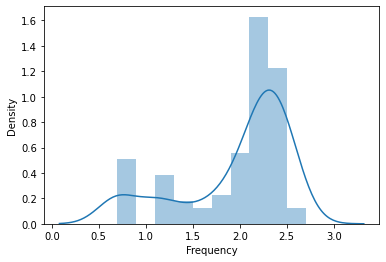

In [234]:
Frequency_Plot = Log_Tfd_Data['Frequency']
ax = sns.distplot(Frequency_Plot)


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



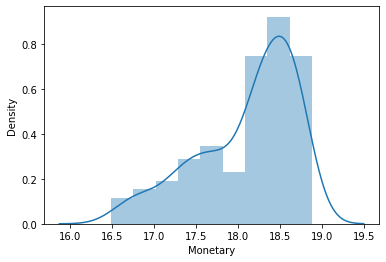

In [235]:
Monetary_Plot = Log_Tfd_Data.query('Monetary < 100000000')['Monetary']
ax = sns.distplot(Monetary_Plot)

In [236]:
#Frequency_Plot = Log_Tfd_Data.query('Frequency < 100')['Frequency']
#ax = sns.distplot(Frequency_Plot)

In [237]:
from sklearn.preprocessing import StandardScaler

#Bring the data on same scale
scaleobj = StandardScaler()
Scaled_Data = scaleobj.fit_transform(Log_Tfd_Data)

#Transform it back to dataframe
Scaled_Data = pd.DataFrame(Scaled_Data, index = FMTScores.index, columns = Log_Tfd_Data.columns)

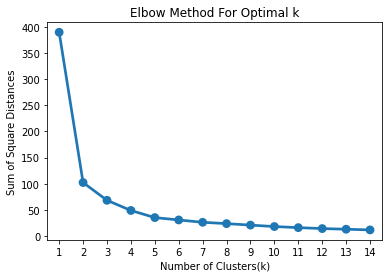

In [238]:
from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(Scaled_Data)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [239]:
#Perform K-Mean Clustering or build the K-Means clustering model
KMean_clust = KMeans(n_clusters= 4, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(Scaled_Data)

#Find the clusters for the observation given in the dataset
FMTScores['Cluster'] = KMean_clust.labels_
FMTScores.head()

,Frequency,Monetary,P,TSCORE,Recency,R,F,M,FMTGroup,FMTScore,FMT_Loyalty_Level,Cluster
CUSTOMER ID,,,,,,,,,,,,
100021,7,62100000,3,3.250000,1,5.00,1.0,20,1.0203.2513,32.250000,Silver,3
100022,5,47700000,1,6.230000,10,5.00,1.0,20,1.0206.23101,33.230000,Silver,0
100023,9,86220000,1,2.694444,88,-6.80,1.0,20,1.0202.6944444444444446881,17.894444,Silver,3
100024,9,122760000,5,6.874444,88,-6.80,1.0,340,1.03406.874444444444445885,346.074444,Platinum,1
100025,4,37620000,0,6.230000,169,-8.85,1.0,20,1.0206.231690,18.380000,Silver,0


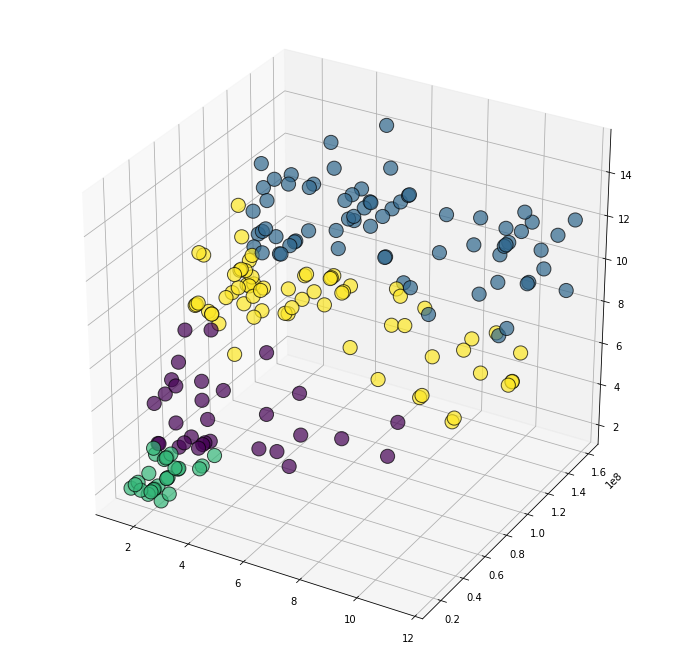

In [241]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

x = FMTScores['TSCORE']
y = FMTScores['Monetary']
z = FMTScores['Frequency']

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z,
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200,
           c=FMTScores['Cluster'])
plt.show()

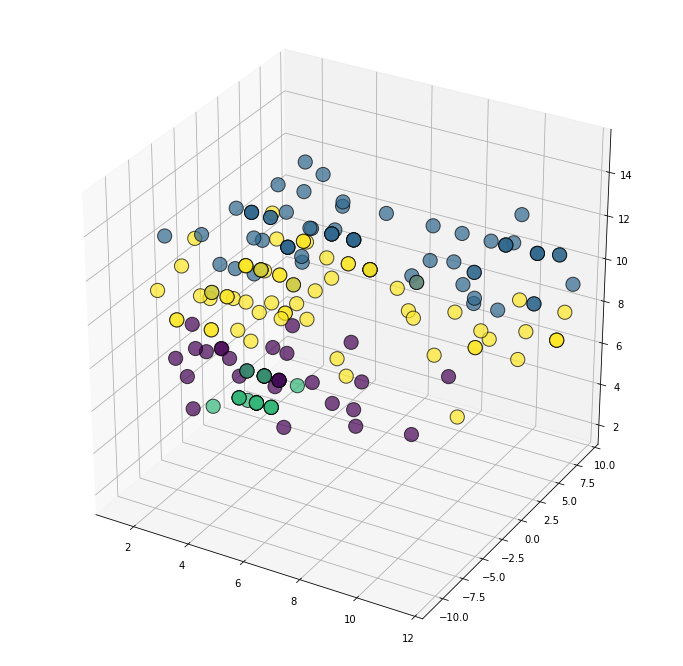

In [242]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

x = FMTScores['TSCORE']
y = FMTScores['P']
z = FMTScores['Frequency']

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z,
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200,
           c=FMTScores['Cluster'])
plt.show()

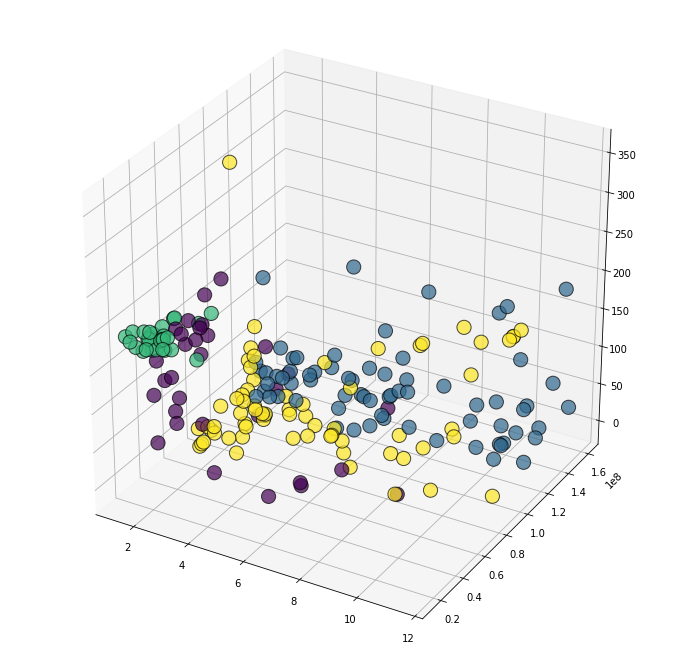

In [243]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

x = FMTScores['TSCORE']
y = FMTScores['Monetary']
z = FMTScores['Recency']

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z,
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200,
           c=FMTScores['Cluster'])
plt.show()

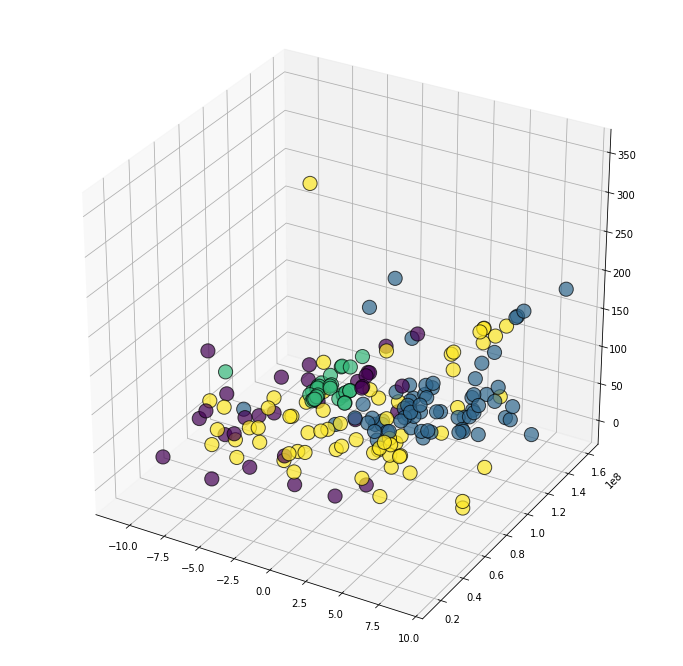

In [244]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

x = FMTScores['P']
y = FMTScores['Monetary']
z = FMTScores['Recency']

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z,
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200,
           c=FMTScores['Cluster'])
plt.show()

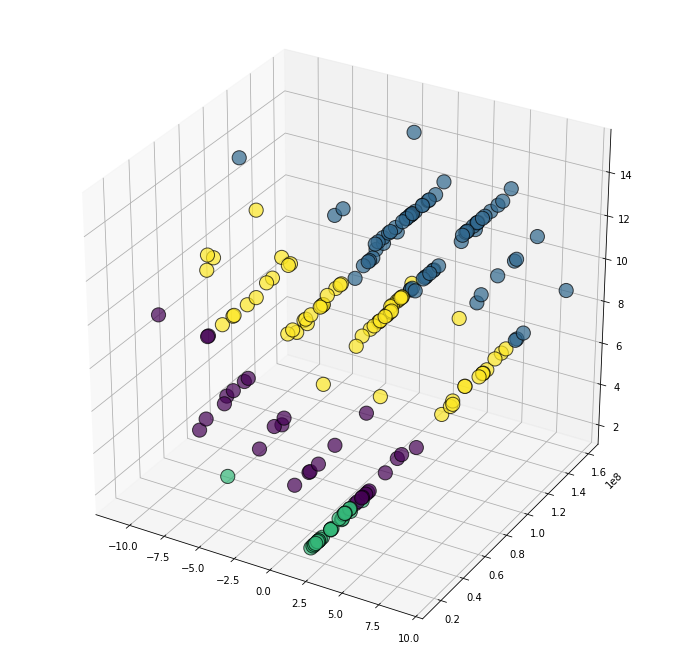

In [245]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

x = FMTScores['P']
y = FMTScores['Monetary']
z = FMTScores['Frequency']

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z,
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200,
           c=FMTScores['Cluster'])
plt.show()

<Figure size 504x504 with 0 Axes>

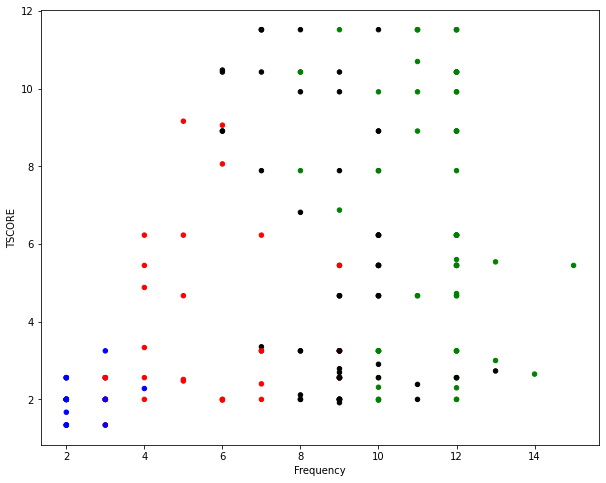

In [248]:
from matplotlib import pyplot as plt
plt.figure(figsize=(7,7))

##Scatter Plot Frequency Vs Recency
Colors = ["red", "green", "blue","black"]
FMTScores['Color'] = FMTScores['Cluster'].map(lambda p: Colors[p])
ax = FMTScores.plot(    
    kind="scatter", 
    x="Frequency", y="TSCORE",
    figsize=(10,8),
    c = FMTScores['Color']
)

<Figure size 504x504 with 0 Axes>

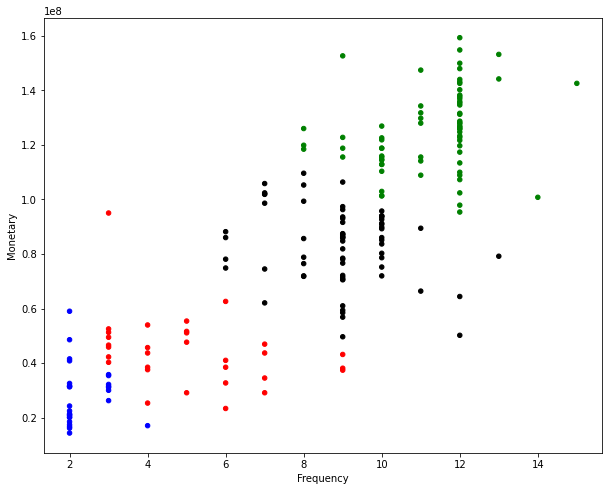

In [249]:
from matplotlib import pyplot as plt
plt.figure(figsize=(7,7))

##Scatter Plot Frequency Vs Recency
Colors = ["red", "green", "blue","black"]
FMTScores['Color'] = FMTScores['Cluster'].map(lambda p: Colors[p])
ax = FMTScores.plot(    
    kind="scatter", 
    x="Frequency", y="Monetary",
    figsize=(10,8),
    c = FMTScores['Color']
)

<Figure size 504x504 with 0 Axes>

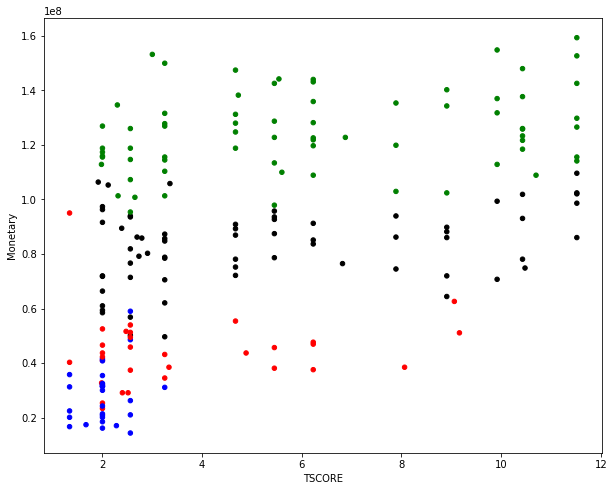

In [250]:
from matplotlib import pyplot as plt
plt.figure(figsize=(7,7))

##Scatter Plot Frequency Vs Recency
Colors = ["red", "green", "blue","black"]
FMTScores['Color'] = FMTScores['Cluster'].map(lambda p: Colors[p])
ax = FMTScores.plot(    
    kind="scatter", 
    x="TSCORE", y="Monetary",    figsize=(10,8),
    c = FMTScores['Color']
)

<Figure size 504x504 with 0 Axes>

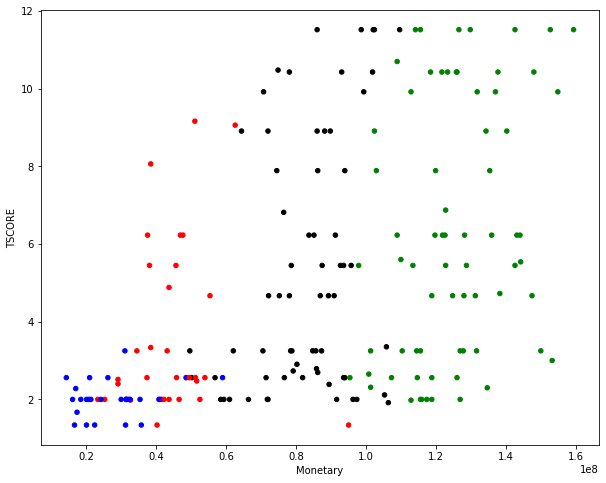

In [251]:
from matplotlib import pyplot as plt
plt.figure(figsize=(7,7))

##Scatter Plot Frequency Vs Recency
Colors = ["red", "green", "blue","black"]
FMTScores['Color'] = FMTScores['Cluster'].map(lambda p: Colors[p])
ax = FMTScores.plot(    
    kind="scatter", 
    x="Monetary", y="TSCORE",
    figsize=(10,8),
    c = FMTScores['Color']
)

<Figure size 504x504 with 0 Axes>

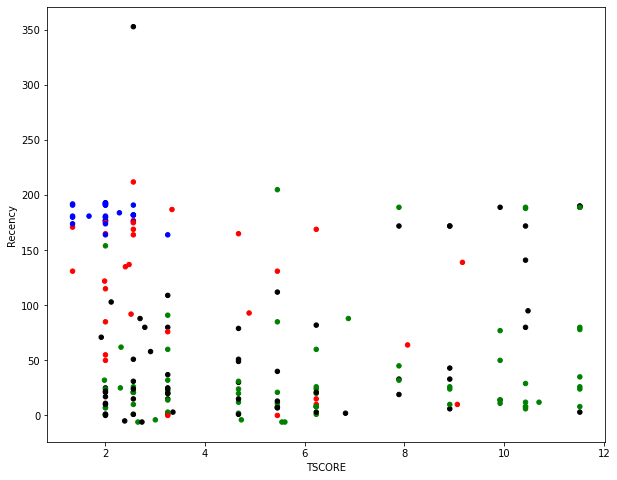

In [252]:
from matplotlib import pyplot as plt
plt.figure(figsize=(7,7))

##Scatter Plot Frequency Vs Recency
Colors = ["red", "green", "blue","black"]
FMTScores['Color'] = FMTScores['Cluster'].map(lambda p: Colors[p])
ax = FMTScores.plot(    
    kind="scatter", 
    x="TSCORE", y="Recency",
    figsize=(10,8),
    c = FMTScores['Color']
)



<Figure size 504x504 with 0 Axes>

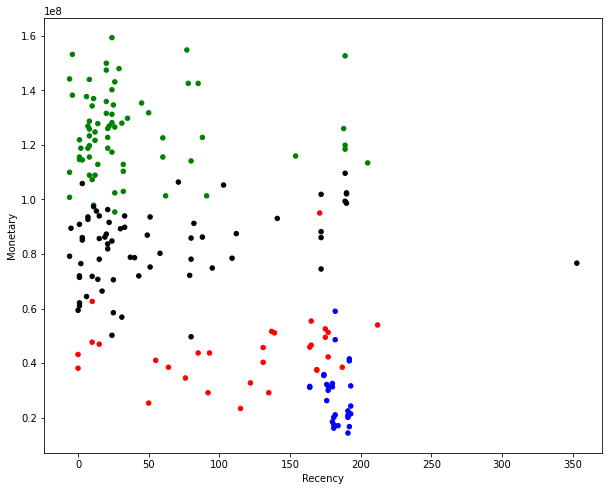

In [253]:
from matplotlib import pyplot as plt
plt.figure(figsize=(7,7))

##Scatter Plot Frequency Vs Recency
Colors = ["red", "green", "blue","black"]
FMTScores['Color'] = FMTScores['Cluster'].map(lambda p: Colors[p])
ax = FMTScores.plot(    
    kind="scatter", 
    x="Recency", y="Monetary",
    figsize=(10,8),
    c = FMTScores['Color']
)

In [254]:
FMTScores.head()

,Frequency,Monetary,P,TSCORE,Recency,R,F,M,FMTGroup,FMTScore,FMT_Loyalty_Level,Cluster,Color
CUSTOMER ID,,,,,,,,,,,,,
100021,7,62100000,3,3.250000,1,5.00,1.0,20,1.0203.2513,32.250000,Silver,3,black
100022,5,47700000,1,6.230000,10,5.00,1.0,20,1.0206.23101,33.230000,Silver,0,red
100023,9,86220000,1,2.694444,88,-6.80,1.0,20,1.0202.6944444444444446881,17.894444,Silver,3,black
100024,9,122760000,5,6.874444,88,-6.80,1.0,340,1.03406.874444444444445885,346.074444,Platinum,1,green
100025,4,37620000,0,6.230000,169,-8.85,1.0,20,1.0206.231690,18.380000,Silver,0,red


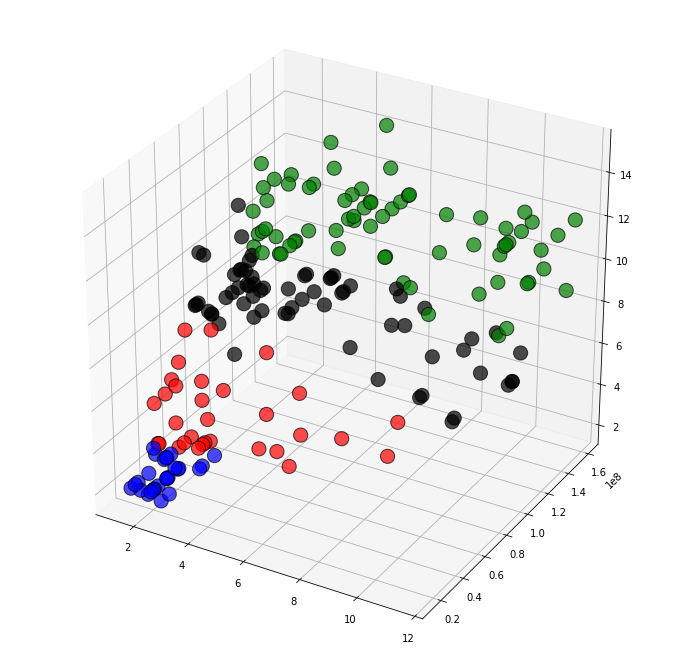

In [255]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

x = FMTScores['TSCORE']
y = FMTScores['Monetary']
z = FMTScores['Frequency']

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z,
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200,
           c=FMTScores['Color'])
plt.show()